### Importy

In [26]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
import matplotlib.pyplot as plt

### Wczytanie pliku z danymi wejściowymi

In [27]:
df = pd.read_csv("exoplanets.csv")

In [28]:
df.head()

,loc_rowid,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_dens,st_dist,gaia_dist,st_optmag,gaia_gmag,st_teff,st_mass,st_rad,pl_rvamp,pl_eqt,pl_bmasse,pl_rade,pl_trandep,pl_trandur,pl_mnum,st_radv,st_logg,st_lum,st_dens,st_metfe,st_age,st_vsini
0,1,1,326.03000,1.29,0.231,NaN,NaN,93.37,93.37,4.740,4.372,4742.0,2.70,19.00,302.8,NaN,6165.6000,NaN,NaN,NaN,0,43.37,2.31,2.243,NaN,-0.35,NaN,1.20
1,2,1,516.21997,1.53,0.080,NaN,NaN,125.72,125.72,5.016,4.500,4213.0,2.78,29.79,189.7,NaN,4684.8142,NaN,NaN,NaN,0,-17.52,1.93,NaN,NaN,-0.02,NaN,1.50
2,3,1,185.84000,0.83,0.000,NaN,NaN,75.59,75.59,5.227,4.872,4813.0,2.20,11.00,100.0,NaN,1525.5000,NaN,NaN,NaN,0,-59.73,2.63,1.763,NaN,-0.24,NaN,2.60
3,4,1,1773.40002,2.93,0.370,NaN,NaN,17.94,17.94,6.610,6.379,5338.0,0.90,0.93,90.0,NaN,1481.0878,NaN,NaN,NaN,0,NaN,4.45,NaN,NaN,0.41,NaN,1.60
4,5,1,798.50000,1.66,0.680,NaN,NaN,21.15,21.15,6.250,6.057,5750.0,1.08,1.13,50.5,NaN,565.7374,NaN,NaN,NaN,0,-28.10,4.36,NaN,NaN,0.06,NaN,2.18


### Kształt ramki danych

In [29]:
l_obiektow = df.shape[0]
l_atrybutow = df.columns.size

print('Liczba obiektów: {}'.format(l_obiektow))
print('Liczba atrybutów: {}\n'.format(l_atrybutow))

Liczba obiektów: 4104
Liczba atrybutów: 28



In [30]:
l_brakow = df.isnull().sum().sum()

print('Brakująca liczba danych: {}\n'.format(l_brakow))

Brakująca liczba danych: 43828



### Podstawowe wskaźniki statystyczne dla ramki danych

In [31]:
column_map = {
    "loc_rowid" : "ID",
    "pl_pnum" : "Number of Planets in System",
    "pl_orbper" : "Orbital Period (days)",
    "pl_orbsmax" : "Orbit Semi-Major Axis (AU)",
    "pl_orbeccen" : "Eccentricity",
    "pl_orbincl" : "Inclination (deg)",
    "pl_dens" : "Planet Density (g/cm**3)",
    "st_dist" : "Distance (pc)",
    "gaia_dist" : "Gaia Distance [pc]",
    "st_optmag" : "Optical Magnitude [mag]",
    "gaia_gmag" : "G-band (Gaia) [mag]",
    "st_teff" : "Effective Temperature (K)",
    "st_mass" : "Stellar Mass (solar mass)",
    "st_rad" : "Stellar Radius (solar radii)",
    "pl_rvamp" : "Radial Velocity Amplitude [m/s]",
    "pl_eqt" : "Planet Equilibrium Temperature [K]",
    "pl_bmasse" : "Planet Mass [Earth Mass]",
    "pl_rade" : "Planet Radius (Earth radii)",
    "pl_trandep" : "Transit Depth (percentage)",
    "pl_trandur" : "Transit Duration (days)",
    "pl_mnum" : "Number of Moons in System",
    "st_radv" : "Stellar Radial Velocity (km/sec)",
    "st_logg" : "Stellar Surface Gravity",
    "st_lum" : "Stellar Luminosity [log(solar)]",
    "st_dens" : "Stellar Density [g/cm**3]",
    "st_metfe" : "Stellar Metallicity (dex)",
    "st_age" : "Stellar Age [Gyr]",
    "st_vsini" : "Rotational Velocity v*sin(i) [km/s]" 
}
df = df.rename(columns=column_map)

### Usuwamy nieistotne dla nas dane o planetach

In [32]:
df.describe()

,ID,Number of Planets in System,Orbital Period (days),Orbit Semi-Major Axis (AU),Eccentricity,Inclination (deg),Planet Density (g/cm**3),Distance (pc),Gaia Distance [pc],Optical Magnitude [mag],G-band (Gaia) [mag],Effective Temperature (K),Stellar Mass (solar mass),Stellar Radius (solar radii),Radial Velocity Amplitude [m/s],Planet Equilibrium Temperature [K],Planet Mass [Earth Mass],Planet Radius (Earth radii),Transit Depth (percentage),Transit Duration (days),Number of Moons in System,Stellar Radial Velocity (km/sec),Stellar Surface Gravity,Stellar Luminosity [log(solar)],Stellar Density [g/cm**3],Stellar Metallicity (dex),Stellar Age [Gyr],Rotational Velocity v*sin(i) [km/s]
count,4104.000000,4104.000000,3.986000e+03,2424.000000,1425.000000,876.000000,491.000000,4098.000000,3922.000000,3904.000000,3949.000000,3872.000000,3338.000000,3745.000000,1281.000000,668.000000,1656.000000,3158.000000,362.000000,2532.000000,4104.0,1830.000000,3595.000000,633.000000,704.000000,2862.000000,2056.000000,1405.000000
mean,2052.500000,1.775341,2.306825e+03,6.564587,0.161211,86.198435,2.550300,634.858382,601.432027,12.682565,12.576593,5492.436743,1.002828,1.542417,106.473152,1118.480539,798.166702,4.229484,0.823579,0.168379,0.0,-2.323339,4.351054,-0.185122,2.984855,0.014503,4.144841,5.293817
std,1184.867081,1.156830,1.159974e+05,79.871667,0.187956,8.478420,5.170593,831.537402,760.003375,2.966049,2.990899,1764.707461,0.650181,3.700614,239.089074,578.209031,1407.662053,4.802397,0.673633,0.112660,0.0,32.767284,0.424362,1.151098,8.713126,0.176270,2.159694,13.618286
min,1.000000,1.000000,9.070629e-02,0.004400,0.000000,7.700000,0.030000,1.300000,1.300000,0.850000,2.804000,575.000000,0.010000,0.010000,-404.000000,50.000000,0.020000,0.336000,0.001200,0.013890,0.0,-121.900000,1.200000,-3.480000,0.024600,-0.890000,0.001000,0.000000
25%,1026.750000,1.000000,4.489907e+00,0.057000,0.015000,86.107500,0.415500,153.740000,149.912500,11.411000,11.274000,5020.000000,0.810000,0.800000,9.300000,657.250000,28.375000,1.570000,0.165000,0.099388,0.0,-20.930000,4.290000,-0.770000,0.621000,-0.060000,2.950000,1.600000
50%,2052.500000,1.000000,1.187372e+01,0.118000,0.100000,88.095000,0.994000,473.070000,465.265000,13.664000,13.541000,5599.500000,0.970000,0.980000,47.470000,1071.500000,273.333800,2.340000,0.779900,0.140092,0.0,-2.665000,4.440000,-0.076000,1.265000,0.020000,4.070000,2.660000
75%,3078.250000,2.000000,4.260425e+01,0.690000,0.230000,89.278000,2.600000,864.000000,884.672500,14.909250,14.856000,5923.000000,1.130000,1.260000,120.700000,1518.500000,807.259550,3.597500,1.200000,0.203105,0.0,16.150000,4.560000,0.465000,2.330000,0.110000,4.790000,4.420000
max,4104.000000,8.000000,7.300000e+06,2500.000000,0.950000,133.000000,77.700000,8500.000000,27199.210000,20.150000,20.480000,57000.000000,23.560000,71.230000,6114.000000,4050.000000,17668.169700,77.342000,3.230000,2.233333,0.0,245.200000,5.520000,3.015000,84.100000,0.690000,14.900000,299.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 28 columns):
ID                                     4104 non-null int64
Number of Planets in System            4104 non-null int64
Orbital Period (days)                  3986 non-null float64
Orbit Semi-Major Axis (AU)             2424 non-null float64
Eccentricity                           1425 non-null float64
Inclination (deg)                      876 non-null float64
Planet Density (g/cm**3)               491 non-null float64
Distance (pc)                          4098 non-null float64
Gaia Distance [pc]                     3922 non-null float64
Optical Magnitude [mag]                3904 non-null float64
G-band (Gaia) [mag]                    3949 non-null float64
Effective Temperature (K)              3872 non-null float64
Stellar Mass (solar mass)              3338 non-null float64
Stellar Radius (solar radii)           3745 non-null float64
Radial Velocity Amplitude [m/s]        1281 n

Mapa skorelowania poszczególnych atrybutów

In [34]:
# Usunięty atrybut powodujący NaN w macierzy korelacji
df = df.drop(labels=['Number of Moons in System', ], axis=1)

In [ ]:
corr = df.corr()
plt.figure(figsize=(64, 64), dpi = 300)
sns.heatmap(df.corr(), annot = df.corr())

### Badamy najsilniej skorelowane atrybuty

In [36]:
df_abs_corr = df.corr().abs() # Wartosci bezwzgledne macierzy korelacji
s_abs_corr = df_abs_corr.unstack() # seria wartości bezwzględnych
sorted_abs_corr = s_abs_corr.sort_values(kind="quicksort") # seria posortowana

c  = sorted_abs_corr[~sorted_abs_corr.isin([1.0])] # usuwam korelację 1.0
c  = c[~c.between(0, 0.5)] # usuwam niskie korelacje
print(c)

Effective Temperature (K)           Stellar Luminosity [log(solar)]       0.505804
Stellar Luminosity [log(solar)]     Effective Temperature (K)             0.505804
Stellar Surface Gravity             G-band (Gaia) [mag]                   0.516420
G-band (Gaia) [mag]                 Stellar Surface Gravity               0.516420
Stellar Radius (solar radii)        Planet Equilibrium Temperature [K]    0.520485
Planet Equilibrium Temperature [K]  Stellar Radius (solar radii)          0.520485
Stellar Mass (solar mass)           Stellar Radius (solar radii)          0.523702
Stellar Radius (solar radii)        Stellar Mass (solar mass)             0.523702
Optical Magnitude [mag]             Stellar Luminosity [log(solar)]       0.526180
Stellar Luminosity [log(solar)]     Optical Magnitude [mag]               0.526180
Optical Magnitude [mag]             Stellar Surface Gravity               0.529884
Stellar Surface Gravity             Optical Magnitude [mag]               0.529884
Plan

In [37]:
# nie interesuje nas znak
corr_array = corr.abs().values
# wyrzucamy NaNy
corr_array  = corr_array[~np.isnan(corr_array)]
#sortujemy 
corr_sorted = np.sort(corr_array[::-1], axis=0)
# wyrzucamy wartoci z przekątnej 
corr_sorted = corr_sorted[np.where( corr_sorted != 1.0 )]
# Maksymalny wskaźnik skorelowania pomiędzy danymi
np.amax(corr_sorted)

0.9947173124219368

### Pokazujemy jak rozkładają się wartości skorelowania danych

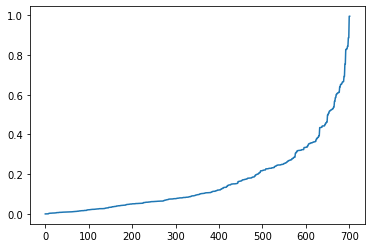

In [22]:
plt.plot(corr_sorted)
plt.show()

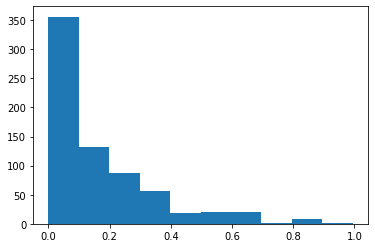

In [23]:
plt.hist(corr_sorted)
plt.show()

In [ ]:
#TODO 
Mamy kilka atrybutów silnie skorelowanych. Warto by je znaleźc i o tym napisać